In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import configparser

# config
config = configparser.ConfigParser()
config.read('./config.txt') # you should create config.txt
accountID = config['oanda']['account_id']
access_token = config['oanda']['api_key']

import json
from oandapyV20 import API
from oandapyV20.exceptions import V20Error
from oandapyV20.endpoints.pricing import PricingStream
import oandapyV20.endpoints.instruments as instruments
import oandapyV20.endpoints.orders as orders
import oandapyV20.endpoints.trades as trades

# OANDAのデモ口座へのAPI接続
api = API(access_token=access_token, environment="practice")

In [12]:
r = instruments.InstrumentsCandles(instrument="USD_JPY", params={
    "count": 5000,
    "granularity": "M5"
})
_ = api.request(r)

In [13]:
_['candles'][:5]

[{'complete': True,
  'mid': {'c': '109.987', 'h': '109.992', 'l': '109.982', 'o': '109.988'},
  'time': '2019-02-05T02:45:00.000000000Z',
  'volume': 18},
 {'complete': True,
  'mid': {'c': '109.982', 'h': '109.986', 'l': '109.982', 'o': '109.984'},
  'time': '2019-02-05T02:50:00.000000000Z',
  'volume': 8},
 {'complete': True,
  'mid': {'c': '109.977', 'h': '109.980', 'l': '109.970', 'o': '109.980'},
  'time': '2019-02-05T02:55:00.000000000Z',
  'volume': 14},
 {'complete': True,
  'mid': {'c': '109.967', 'h': '109.975', 'l': '109.967', 'o': '109.975'},
  'time': '2019-02-05T03:00:00.000000000Z',
  'volume': 4},
 {'complete': True,
  'mid': {'c': '109.966', 'h': '109.968', 'l': '109.964', 'o': '109.964'},
  'time': '2019-02-05T03:05:00.000000000Z',
  'volume': 4}]

In [34]:
r = orders.OrderCreate(accountID, data={
  "order": {
    "instrument": "USD_JPY",
    "units": "-9000",
    "type": "MARKET",
    "positionFill": "DEFAULT"
  }
})
api.request(r)

{'lastTransactionID': '73',
 'orderCreateTransaction': {'accountID': '101-009-10632673-001',
  'batchID': '72',
  'id': '72',
  'instrument': 'USD_JPY',
  'positionFill': 'DEFAULT',
  'reason': 'CLIENT_ORDER',
  'requestID': '24521249570299588',
  'time': '2019-02-28T11:43:04.504376985Z',
  'timeInForce': 'FOK',
  'type': 'MARKET_ORDER',
  'units': '-9000',
  'userID': 10632673},
 'orderFillTransaction': {'accountBalance': '2999090.6081',
  'accountID': '101-009-10632673-001',
  'batchID': '72',
  'commission': '0.0000',
  'financing': '0.1171',
  'fullPrice': {'asks': [{'liquidity': '250000', 'price': '110.756'}],
   'bids': [{'liquidity': '250000', 'price': '110.752'}],
   'closeoutAsk': '110.776',
   'closeoutBid': '110.732',
   'timestamp': '2019-02-28T11:42:39.021902916Z'},
  'fullVWAP': '110.752',
  'gainQuoteHomeConversionFactor': '1',
  'guaranteedExecutionFee': '0.0000',
  'halfSpreadCost': '18.0000',
  'id': '73',
  'instrument': 'USD_JPY',
  'lossQuoteHomeConversionFactor': 

In [86]:
r = trades.OpenTrades(accountID=accountID)
res = api.request(r)
float(res['trades'][0]['price'])

1.13763

In [33]:
# 注文の決済
r = trades.TradeClose(accountID=accountID, tradeID=65, data={'units':'1000'})
api.request(r)

{'lastTransactionID': '71',
 'orderCreateTransaction': {'accountID': '101-009-10632673-001',
  'batchID': '70',
  'id': '70',
  'instrument': 'USD_JPY',
  'positionFill': 'REDUCE_ONLY',
  'reason': 'TRADE_CLOSE',
  'requestID': '24521249486374423',
  'time': '2019-02-28T11:42:44.279173390Z',
  'timeInForce': 'FOK',
  'tradeClose': {'tradeID': '65', 'units': '1000'},
  'type': 'MARKET_ORDER',
  'units': '-1000',
  'userID': 10632673},
 'orderFillTransaction': {'accountBalance': '2999126.4910',
  'accountID': '101-009-10632673-001',
  'batchID': '70',
  'commission': '0.0000',
  'financing': '0.0114',
  'fullPrice': {'asks': [{'liquidity': '250000', 'price': '110.756'}],
   'bids': [{'liquidity': '250000', 'price': '110.752'}],
   'closeoutAsk': '110.776',
   'closeoutBid': '110.732',
   'timestamp': '2019-02-28T11:42:39.021902916Z'},
  'fullVWAP': '110.752',
  'gainQuoteHomeConversionFactor': '1',
  'guaranteedExecutionFee': '0.0000',
  'halfSpreadCost': '2.0000',
  'id': '71',
  'instr

In [17]:
# APIに渡すパラメーターの設定
params = {
    "count":2000,
    "granularity":"S5"
}
r = instruments.InstrumentsCandles(instrument="USD_JPY", params=params)
api.request(r)

{'candles': [{'complete': True,
   'mid': {'c': '110.868', 'h': '110.870', 'l': '110.868', 'o': '110.870'},
   'time': '2019-02-28T02:16:15.000000000Z',
   'volume': 2},
  {'complete': True,
   'mid': {'c': '110.870', 'h': '110.873', 'l': '110.870', 'o': '110.870'},
   'time': '2019-02-28T02:16:20.000000000Z',
   'volume': 3},
  {'complete': True,
   'mid': {'c': '110.872', 'h': '110.872', 'l': '110.872', 'o': '110.872'},
   'time': '2019-02-28T02:16:30.000000000Z',
   'volume': 1},
  {'complete': True,
   'mid': {'c': '110.870', 'h': '110.870', 'l': '110.870', 'o': '110.870'},
   'time': '2019-02-28T02:16:55.000000000Z',
   'volume': 1},
  {'complete': True,
   'mid': {'c': '110.862', 'h': '110.868', 'l': '110.862', 'o': '110.868'},
   'time': '2019-02-28T02:17:00.000000000Z',
   'volume': 3},
  {'complete': True,
   'mid': {'c': '110.864', 'h': '110.864', 'l': '110.864', 'o': '110.864'},
   'time': '2019-02-28T02:17:05.000000000Z',
   'volume': 1},
  {'complete': True,
   'mid': {'c'

In [18]:
r.response['candles'][0]

{'complete': True,
 'mid': {'c': '110.868', 'h': '110.870', 'l': '110.868', 'o': '110.870'},
 'time': '2019-02-28T02:16:15.000000000Z',
 'volume': 2}

In [19]:
data = []
for raw in r.response['candles']:
    data.append([raw['time'], raw['volume'], raw['mid']['o'], raw['mid']['h'], raw['mid']['l'], raw['mid']['c']])

In [20]:
# リストからPandas DataFrameへ変換
df = pd.DataFrame(data)
df.columns = ['Time', 'Volume', 'Open', 'High', 'Low', 'Close']
df = df.set_index('Time')
df.index = pd.to_datetime(df.index)
df = df.astype('float64')
df.head()

,Volume,Open,High,Low,Close
Time,,,,,
2019-02-28 02:16:15,2.0,110.870,110.870,110.868,110.868
2019-02-28 02:16:20,3.0,110.870,110.873,110.870,110.870
2019-02-28 02:16:30,1.0,110.872,110.872,110.872,110.872
2019-02-28 02:16:55,1.0,110.870,110.870,110.870,110.870
2019-02-28 02:17:00,3.0,110.868,110.868,110.862,110.862


In [21]:
df

,Volume,Open,High,Low,Close
Time,,,,,
2019-02-28 02:16:15,2.0,110.870,110.870,110.868,110.868
2019-02-28 02:16:20,3.0,110.870,110.873,110.870,110.870
2019-02-28 02:16:30,1.0,110.872,110.872,110.872,110.872
2019-02-28 02:16:55,1.0,110.870,110.870,110.870,110.870
2019-02-28 02:17:00,3.0,110.868,110.868,110.862,110.862
2019-02-28 02:17:05,1.0,110.864,110.864,110.864,110.864
2019-02-28 02:17:10,1.0,110.862,110.862,110.862,110.862
2019-02-28 02:17:15,4.0,110.864,110.866,110.864,110.866
2019-02-28 02:17:20,2.0,110.864,110.866,110.864,110.866


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2019-02-28 02:16:15 to 2019-02-28 11:40:00
Data columns (total 5 columns):
Volume    2000 non-null float64
Open      2000 non-null float64
High      2000 non-null float64
Low       2000 non-null float64
Close     2000 non-null float64
dtypes: float64(5)
memory usage: 93.8 KB


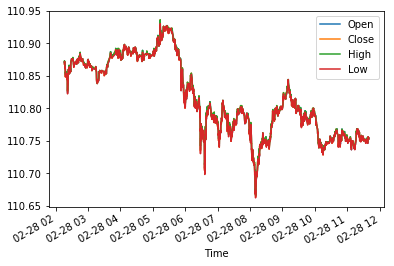

In [23]:
df[['Open', 'Close','High', 'Low']].plot()

In [24]:
df.tail()

,Volume,Open,High,Low,Close
Time,,,,,
2019-02-28 11:38:30,2.0,110.752,110.754,110.752,110.754
2019-02-28 11:39:00,1.0,110.756,110.756,110.756,110.756
2019-02-28 11:39:05,1.0,110.754,110.754,110.754,110.754
2019-02-28 11:39:40,1.0,110.752,110.752,110.752,110.752
2019-02-28 11:40:00,1.0,110.754,110.754,110.754,110.754


# トラップリピート注文

In [37]:
interval = 0.0015
price_range = np.arange(1.1220, 1.1490, interval)
profit = interval
stop_loss =  1.1560

In [43]:
def frmt(v):
    # format a number over 6 digits: 12004.1, 1.05455
    l = len(str(v).split(".")[0])
    return "{{:{}.{}f}}".format(l, 6-l).format(v)

In [69]:
import re
import time
import argparse
from datetime import datetime
import calendar
import json
import logging
from oandapyV20 import API
from oandapyV20.exceptions import V20Error
import oandapyV20.endpoints.instruments as instruments
import oandapyV20.endpoints.pricing as pricing
import oandapyV20.endpoints.orders as orders
import oandapyV20.endpoints.positions as positions
from oandapyV20.contrib.requests import (
    MarketOrderRequest,
    TakeProfitDetails,
    StopLossDetails
)
class PRecordFactory(object):
    """generate price records from streaming prices."""
    def __init__(self, granularity):
        self._last = None
        self._granularity = granularity
        self.interval = self.granularity_to_time(granularity)
        self.data = {'bid':None, 'ask':None ,"c": None, "v": 0}

    def parseTick(self, t):
        rec = None
        if not self._last:
            if t["type"] != "PRICE":
                return rec
            epoch = self.epochTS(t["time"])
            self._last = epoch - (epoch % self.interval)

        if self.epochTS(t["time"]) > self._last + self.interval:
            # save this record as comnpleted
            rec = self.data#(self.secs2time(self._last), self.data['c'], self.data['v'])
            # init new one
            self._last += self.interval
            self.data["v"] = 0

        if t["type"] == "PRICE":
            self.data["c"] = (float(t['closeoutBid']) +
                              float(t['closeoutAsk'])) / 2.0
            self.data['bid'] = float(t['closeoutBid'])
            self.data['ask'] = float(t['closeoutAsk'])
            self.data["v"] += 1

        return rec

    def granularity_to_time(self, gran):
        mfact = {'S': 1, 'M': 60, 'H': 3600, 'D': 86400}
        try:
            f, n = re.match("(?P<f>[SMHD])(?:(?P<n>\d+)|)",
                            gran).groups()
        except:
            raise ValueError("Can't handle granularity: {}".format(gran))
        else:
            n = int(n) if n else 1
            return mfact[f] * n
        
    def epochTS(self, t):
        d = datetime.strptime(t.split(".")[0], '%Y-%m-%dT%H:%M:%S')
        return int(calendar.timegm(d.timetuple()))

    def secs2time(self, e):
        w = time.gmtime(e)
        return datetime(*list(w)[0:6]).strftime("%Y-%m-%dT%H:%M:%S.000000Z")

In [70]:
ps = PricingStream(accountID=accountID, params={'instruments': 'EUR_USD'})

In [109]:
cf = PRecordFactory('S1')
try:
    for rsp in api.request(ps):
        print(rsp)
        #rec = cf.parseTick(rsp)
        #if rec:
        #    print(rec)
            
 
 
except V20Error as e:
    print("Error: {}".format(e))

{'type': 'PRICE', 'time': '2019-02-28T17:44:43.964683187Z', 'bids': [{'price': '1.13794', 'liquidity': 250000}], 'asks': [{'price': '1.13799', 'liquidity': 250000}], 'closeoutBid': '1.13775', 'closeoutAsk': '1.13819', 'status': 'tradeable', 'tradeable': True, 'instrument': 'EUR_USD'}
{'type': 'HEARTBEAT', 'time': '2019-02-28T17:44:50.625259943Z'}
{'type': 'HEARTBEAT', 'time': '2019-02-28T17:44:55.630250623Z'}
{'type': 'PRICE', 'time': '2019-02-28T17:44:59.027162433Z', 'bids': [{'price': '1.13792', 'liquidity': 250000}], 'asks': [{'price': '1.13797', 'liquidity': 250000}], 'closeoutBid': '1.13773', 'closeoutAsk': '1.13816', 'status': 'tradeable', 'tradeable': True, 'instrument': 'EUR_USD'}
{'type': 'HEARTBEAT', 'time': '2019-02-28T17:45:00.633863719Z'}
{'type': 'PRICE', 'time': '2019-02-28T17:45:04.048488048Z', 'bids': [{'price': '1.13794', 'liquidity': 250000}], 'asks': [{'price': '1.13799', 'liquidity': 250000}], 'closeoutBid': '1.13776', 'closeoutAsk': '1.13818', 'status': 'tradeable

KeyboardInterrupt: 

In [119]:
import time 

In [181]:
ps = PricingStream(accountID=accountID, params={'instruments': 'EUR_USD'})
profit = 0.0001
loss = 0.0020
units = 10000
opentrades_req = trades.OpenTrades(accountID=accountID)
while True:
    bt = api.request(opentrades_req)
    for s in api.request(ps):
        keys = s.keys()
        if ('bids' in keys) and ('asks' in keys):
            bid = float(s['bids'][0]['price'])
            ask = float(s['asks'][0]['price'])

            #-----------------#
            price = bid
            direct = -1
            #-----------------#

            deal_order = orders.OrderCreate(accountID, data={
                                              "order": {
                                                  "price":f"{price}",
                                                "instrument": "EUR_USD",
                                                "units": f"{direct*units}",
                                                "type": "LIMIT",
                                                "positionFill": "DEFAULT",
                                                'takeProfitOnFill': {
                                                   'timeInForce': 'GTC',
                                                   'price': f'{price+direct*profit:.5f}'},
                                                'stopLossOnFill': {
                                                   'timeInForce': 'GTC',
                                                   'price': f'{price-direct*loss:.5f}'}
                                              }})
            res = api.request(deal_order)
            limit_time = 5
            start = time.time()
            at = api.request(opentrades_req)
            while len(at['trades'])<=len(bt['trades']) and not (time.time()-start)>limit_time:
                at = api.request(opentrades_req)
            if (time.time()-start)>limit_time:
                #注文が通らなかった
                print('注文が通らなかった')
                r = orders.OrdersPending(accountID)
                api.request(r)
                cancel_req = orders.OrderCancel(accountID=accountID, orderID=r.response['orders'][0]['id'])
                api.request(cancel_req)
                time.sleep(5)
                break
            #注文が通った
            print('注文が通った', price)
            bt = at

            #指値が通るのを待つ
            limit_time = 900
            start = time.time()
            at = api.request(opentrades_req)
            while len(at['trades'])>=len(bt['trades']) and not (time.time()-start)>limit_time:
                at = api.request(opentrades_req)
            if (time.time()-start)>limit_time:
                #時間切れで決済
                print('時間切れで決済')
                trade_id = at['trades'][0]['id']
                r = trades.TradeClose(accountID=accountID, tradeID=trade_id, data={'units':str(units)})
                api.request(r)
                time.sleep(5)
                break
            else:
                #指値が通った
                print('指値が通った')
                break

        else:
            continue

注文が通った 1.13783
指値が通った
注文が通った 1.13769
時間切れで決済
注文が通った 1.13782
時間切れで決済
注文が通った 1.1381
指値が通った
注文が通った 1.13792
時間切れで決済
注文が通った 1.13793
指値が通った
注文が通った 1.13782
時間切れで決済
注文が通った 1.13776
時間切れで決済
注文が通った 1.13772
時間切れで決済
注文が通った 1.13768
指値が通った
注文が通った 1.1375
指値が通った
注文が通った 1.1373
時間切れで決済
注文が通った 1.1372
時間切れで決済
注文が通った 1.1371
時間切れで決済
注文が通った 1.1371
時間切れで決済
注文が通った 1.13704
時間切れで決済
注文が通った 1.13694
時間切れで決済
注文が通った 1.13712
時間切れで決済
注文が通った 1.13698
時間切れで決済
注文が通った 1.13698
時間切れで決済
注文が通った 1.137
時間切れで決済
注文が通った 1.1371
時間切れで決済
注文が通った 1.13717
時間切れで決済
注文が通った 1.13714
指値が通った
注文が通った 1.13699
時間切れで決済
注文が通った 1.1369
時間切れで決済
注文が通った 1.13704
時間切れで決済
注文が通った 1.13723
指値が通った
注文が通った 1.1371
指値が通った
注文が通った 1.13696
時間切れで決済
注文が通った 1.13704
時間切れで決済
注文が通った 1.1372
時間切れで決済
注文が通った 1.13718


KeyboardInterrupt: 

2998003

In [171]:
at = api.request(opentrades_req)
trade_id = at['trades'][0]['id']
r = trades.TradeClose(accountID=accountID, tradeID=trade_id, data={'units':str(units)})
api.request(r)

{'lastTransactionID': '213',
 'orderCreateTransaction': {'accountID': '101-009-10632673-001',
  'batchID': '210',
  'id': '210',
  'instrument': 'EUR_USD',
  'positionFill': 'REDUCE_ONLY',
  'reason': 'TRADE_CLOSE',
  'requestID': '24521354973918400',
  'time': '2019-02-28T18:41:54.826249341Z',
  'timeInForce': 'FOK',
  'tradeClose': {'tradeID': '180', 'units': '10000'},
  'type': 'MARKET_ORDER',
  'units': '10000',
  'userID': 10632673},
 'orderFillTransaction': {'accountBalance': '2999127.6048',
  'accountID': '101-009-10632673-001',
  'batchID': '210',
  'commission': '0.0000',
  'financing': '0.3373',
  'fullPrice': {'asks': [{'liquidity': '250000', 'price': '1.13797'}],
   'bids': [{'liquidity': '250000', 'price': '1.13792'}],
   'closeoutAsk': '1.13816',
   'closeoutBid': '1.13774',
   'timestamp': '2019-02-28T18:41:25.855406199Z'},
  'fullVWAP': '1.13797',
  'gainQuoteHomeConversionFactor': '111.354',
  'guaranteedExecutionFee': '0.0000',
  'halfSpreadCost': '27.8400',
  'id': '

In [163]:
price = 2
deal_order = orders.OrderCreate(accountID, data={
                                          "order": {
                                              "price":f"{price}",
                                            "instrument": "EUR_USD",
                                            "units": f"{direct*units}",
                                            "type": "LIMIT",
                                            "positionFill": "DEFAULT",
                                            'takeProfitOnFill': {
                                               'timeInForce': 'GTC',
                                               'price': f'{price+direct*profit:.5f}'},
                                            'stopLossOnFill': {
                                               'timeInForce': 'GTC',
                                               'price': f'{price-direct*loss:.5f}'}
                                          }})
res = api.request(deal_order)

In [164]:
r = orders.OrdersPending(accountID)
api.request(r)

{'lastTransactionID': '183',
 'orders': [{'createTime': '2019-02-28T18:37:05.305661453Z',
   'id': '183',
   'instrument': 'EUR_USD',
   'partialFill': 'DEFAULT_FILL',
   'positionFill': 'DEFAULT',
   'price': '2.00000',
   'state': 'PENDING',
   'stopLossOnFill': {'price': '2.00200', 'timeInForce': 'GTC'},
   'takeProfitOnFill': {'price': '1.99990', 'timeInForce': 'GTC'},
   'timeInForce': 'GTC',
   'triggerCondition': 'DEFAULT',
   'type': 'LIMIT',
   'units': '-10000'},
  {'createTime': '2019-02-28T18:35:46.258649102Z',
   'guaranteed': False,
   'id': '182',
   'price': '1.13996',
   'state': 'PENDING',
   'timeInForce': 'GTC',
   'tradeID': '180',
   'triggerCondition': 'DEFAULT',
   'type': 'STOP_LOSS'},
  {'createTime': '2019-02-28T18:35:46.258649102Z',
   'id': '181',
   'price': '1.13786',
   'state': 'PENDING',
   'timeInForce': 'GTC',
   'tradeID': '180',
   'triggerCondition': 'DEFAULT',
   'type': 'TAKE_PROFIT'}]}

In [165]:
r.response['orders'][0]['id']

'183'

In [166]:
cancel_req = orders.OrderCancel(accountID=accountID, orderID=r.response['orders'][0]['id'])
api.request(cancel_req)

{'lastTransactionID': '184',
 'orderCancelTransaction': {'accountID': '101-009-10632673-001',
  'batchID': '184',
  'id': '184',
  'orderID': '183',
  'reason': 'CLIENT_REQUEST',
  'requestID': '24521354210066426',
  'time': '2019-02-28T18:38:52.777102590Z',
  'type': 'ORDER_CANCEL',
  'userID': 10632673},
 'relatedTransactionIDs': ['184']}

In [158]:
time.time()-start>limit_time or 

True

In [141]:
bt = api.request(opentrades_req)

In [142]:
len(bt['trades'])

2

In [143]:
bt['trades'][0]

{'currentUnits': '-10000',
 'financing': '0.0000',
 'id': '145',
 'initialMarginRequired': '50690.4000',
 'initialUnits': '-10000',
 'instrument': 'EUR_USD',
 'marginUsed': '50695.2000',
 'openTime': '2019-02-28T18:08:09.245434003Z',
 'price': '1.13824',
 'realizedPL': '0.0000',
 'state': 'OPEN',
 'stopLossOrder': {'createTime': '2019-02-28T18:08:09.245434003Z',
  'guaranteed': False,
  'id': '147',
  'price': '1.14024',
  'state': 'PENDING',
  'timeInForce': 'GTC',
  'tradeID': '145',
  'triggerCondition': 'DEFAULT',
  'type': 'STOP_LOSS'},
 'takeProfitOrder': {'createTime': '2019-02-28T18:08:09.245434003Z',
  'id': '146',
  'price': '1.13814',
  'state': 'PENDING',
  'timeInForce': 'GTC',
  'tradeID': '145',
  'triggerCondition': 'DEFAULT',
  'type': 'TAKE_PROFIT'},
 'unrealizedPL': '-122.4806'}

In [144]:
# アカウントのオープントレードを全て取得する
r = trades.OpenTrades(accountID=accountID)
api.request(r)

{'lastTransactionID': '148',
 'trades': [{'currentUnits': '-10000',
   'financing': '0.0000',
   'id': '145',
   'initialMarginRequired': '50690.4000',
   'initialUnits': '-10000',
   'instrument': 'EUR_USD',
   'marginUsed': '50695.2000',
   'openTime': '2019-02-28T18:08:09.245434003Z',
   'price': '1.13824',
   'realizedPL': '0.0000',
   'state': 'OPEN',
   'stopLossOrder': {'createTime': '2019-02-28T18:08:09.245434003Z',
    'guaranteed': False,
    'id': '147',
    'price': '1.14024',
    'state': 'PENDING',
    'timeInForce': 'GTC',
    'tradeID': '145',
    'triggerCondition': 'DEFAULT',
    'type': 'STOP_LOSS'},
   'takeProfitOrder': {'createTime': '2019-02-28T18:08:09.245434003Z',
    'id': '146',
    'price': '1.13814',
    'state': 'PENDING',
    'timeInForce': 'GTC',
    'tradeID': '145',
    'triggerCondition': 'DEFAULT',
    'type': 'TAKE_PROFIT'},
   'unrealizedPL': '-44.5404'},
  {'currentUnits': '-10000',
   'financing': '0.0000',
   'id': '141',
   'initialMarginRequir

In [149]:
r.response['trades'][0]['id']

'141'

In [150]:
r = trades.TradeClose(accountID=accountID, tradeID=r.response['trades'][0]['id'], data={'units':'10000'})
api.request(r)

{'lastTransactionID': '152',
 'orderCreateTransaction': {'accountID': '101-009-10632673-001',
  'batchID': '149',
  'id': '149',
  'instrument': 'EUR_USD',
  'positionFill': 'REDUCE_ONLY',
  'reason': 'TRADE_CLOSE',
  'requestID': '24521350000497179',
  'time': '2019-02-28T18:22:08.132050662Z',
  'timeInForce': 'FOK',
  'tradeClose': {'tradeID': '145', 'units': '10000'},
  'type': 'MARKET_ORDER',
  'units': '10000',
  'userID': 10632673},
 'orderFillTransaction': {'accountBalance': '2999704.9712',
  'accountID': '101-009-10632673-001',
  'batchID': '149',
  'commission': '0.0000',
  'financing': '0.7683',
  'fullPrice': {'asks': [{'liquidity': '250000', 'price': '1.13835'}],
   'bids': [{'liquidity': '250000', 'price': '1.13830'}],
   'closeoutAsk': '1.13853',
   'closeoutBid': '1.13811',
   'timestamp': '2019-02-28T18:21:44.476496579Z'},
  'fullVWAP': '1.13835',
  'gainQuoteHomeConversionFactor': '111.343',
  'guaranteedExecutionFee': '0.0000',
  'halfSpreadCost': '27.8375',
  'id': '

In [140]:
res['orderCreateTransaction']

{'accountID': '101-009-10632673-001',
 'batchID': '144',
 'id': '144',
 'instrument': 'EUR_USD',
 'partialFill': 'DEFAULT',
 'positionFill': 'DEFAULT',
 'price': '1.13824',
 'reason': 'CLIENT_ORDER',
 'requestID': '24521346479266431',
 'stopLossOnFill': {'price': '1.14024', 'timeInForce': 'GTC'},
 'takeProfitOnFill': {'price': '1.13814', 'timeInForce': 'GTC'},
 'time': '2019-02-28T18:08:09.245434003Z',
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'type': 'LIMIT_ORDER',
 'units': '-10000',
 'userID': 10632673}

In [97]:
while True:
    opentrades_req = trades.OpenTrades(accountID=accountID)
    bt = api.request(opentrades_req)
    
    deal_order =  orders.OrderCreate(accountID, data={
                  "order": {
                    "instrument": "EUR_USD",
                    "units": "-10000",
                    "type": "MARKET",
                    "positionFill": "DEFAULT"
                  }
                })
    res = api.request(deal_order)
    
    at = api.request(opentrades_req)
    while len(at['trades'])<=len(bt['trades']):
        at = api.request(opentrades_req)
    price = float(at['trades'][0]['price'])
    
    limit_order = orders.OrderCreate(accountID, data={
                      "order": {
                          "price":f"{price}",
                        "instrument": "EUR_USD",
                        "units": "-1000",
                        "type": "LIMIT",
                        "positionFill": "DEFAULT",
                        'takeProfitOnFill': {
                           'timeInForce': 'GTC',
                           'price': f'{price-profit}'},
                        'stopLossOnFill': {
                           'timeInForce': 'GTC',
                           'price': f'{price+loss}'}
                      }})
    break

In [99]:
res = api.request(opentrades_req)
res

{'lastTransactionID': '111',
 'trades': [{'currentUnits': '-10000',
   'financing': '0.0000',
   'id': '111',
   'initialMarginRequired': '50713.6000',
   'initialUnits': '-10000',
   'instrument': 'EUR_USD',
   'marginUsed': '50709.6000',
   'openTime': '2019-02-28T17:22:33.046676478Z',
   'price': '1.13782',
   'realizedPL': '0.0000',
   'state': 'OPEN',
   'unrealizedPL': '-22.2856'},
  {'currentUnits': '-10000',
   'financing': '0.0000',
   'id': '101',
   'initialMarginRequired': '50710.4000',
   'initialUnits': '-10000',
   'instrument': 'EUR_USD',
   'marginUsed': '50709.6000',
   'openTime': '2019-02-28T17:21:11.223519422Z',
   'price': '1.13778',
   'realizedPL': '0.0000',
   'state': 'OPEN',
   'unrealizedPL': '-66.8568'}]}

In [26]:
for price in price_range:
    r = orders.OrderCreate(accountID, data={
      "order": {
          "price":f"{price}",
        "instrument": "EUR_USD",
        "units": "-1000",
        "type": "LIMIT",
        "positionFill": "DEFAULT",
        'takeProfitOnFill': {
           'timeInForce': 'GTC',
           'price': f'{price-profit}'},
        'stopLossOnFill': {
           'timeInForce': 'GTC',
           'price': f'{price+loss}'}
      }})
    api.request(r)

{'lastTransactionID': '68',
 'orderCancelTransaction': {'accountID': '101-009-10632673-001',
  'batchID': '67',
  'id': '68',
  'orderID': '67',
  'reason': 'STOP_LOSS_ON_FILL_LOSS',
  'requestID': '24521248873725682',
  'time': '2019-02-28T11:40:18.021426363Z',
  'type': 'ORDER_CANCEL',
  'userID': 10632673},
 'orderCreateTransaction': {'accountID': '101-009-10632673-001',
  'batchID': '67',
  'id': '67',
  'instrument': 'EUR_USD',
  'partialFill': 'DEFAULT',
  'positionFill': 'DEFAULT',
  'price': '1.13900',
  'reason': 'CLIENT_ORDER',
  'requestID': '24521248873725682',
  'stopLossOnFill': {'price': '1.13910', 'timeInForce': 'GTC'},
  'takeProfitOnFill': {'price': '1.13890', 'timeInForce': 'GTC'},
  'time': '2019-02-28T11:40:18.021426363Z',
  'timeInForce': 'GTC',
  'triggerCondition': 'DEFAULT',
  'type': 'LIMIT_ORDER',
  'units': '-1000',
  'userID': 10632673},
 'relatedTransactionIDs': ['67', '68']}